In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [8]:
# Reading csv file using pandas.
mobiles_data = pd.read_csv('Flipkart_mobiles_data700.csv')

In [9]:
# data of all mobiles.
mobiles_data.head() 

,Mobiles,Colors,Price in Rupees,Off(%),Ram,Rom,Expandable_GB/TB,Dual_sim,Screen_in_inch,Display,Secondary_Camera(MP),Primary_Camera(MP),Battery_details,Warranty(Year),Rating
0,RealmeC2,DiamondBlack,5999,14,2 GB,16 GB,256 GB,yes,6.1,HD,5,13 + 2,4000,1,4.5
1,RealmeC2,DiamondBlue,5999,14,2 GB,16 GB,256 GB,yes,6.1,HD,5,13 + 2,4000,1,4.5
2,SamsungGalaxyOnNxt,Gold,8990,49,3 GB,64 GB,256 GB,yes,5.5,FullHDDisplay,8,13,3300,1,4.3
3,OPPOA37f,Grey,10000,10,2 GB,16 GB,128 GB,yes,5.0,HDDisplay,5,8,2630,1,4.2
4,OPPOA71,Gold,10000,10,3 GB,16 GB,256 GB,yes,5.2,HDDisplay,5,13,3000,1,4.2


In [10]:
# we have 695 mobiles data.
mobiles_data.tail()

,Mobiles,Colors,Price in Rupees,Off(%),Ram,Rom,Expandable_GB/TB,Dual_sim,Screen_in_inch,Display,Secondary_Camera(MP),Primary_Camera(MP),Battery_details,Warranty(Year),Rating
691,HuaweiP9,PrestigeGold,39999,28,3 GB,32 GB,128 GB,yes,5.2,FullHDDisplay,8,12 + 12,3000,1,4.5
692,HuaweiP9,MysticSilver,39999,28,3 GB,32 GB,128 GB,yes,5.2,FullHDDisplay,8,12 + 12,3000,1,4.5
693,OPPOR17Pro,RadiantMist,29990,40,8 GB,128 GB,256GB,yes,6.4,NaN,25,12 + 20,3700,1,4.4
694,SamsungGalaxyNote8,MidnightBlack,36990,50,6 GB,64 GB,256 GB,yes,6.3,QuadHD,8,12 + 12,3300,0,4.6
695,SamsungGalaxyNote8,MapleGold,36990,50,6 GB,64 GB,256 GB,yes,6.3,QuadHD,8,12 + 12,3300,0,4.6


In [11]:
# now we need to drop mobiles,colors & Display columns using pandas.
mobiles_data.drop(['Mobiles','Colors','Display','Off(%)','Rating','Primary_Camera(MP)'], axis='columns', inplace=True)

In [12]:
# dropped four columns
mobiles_data.head()

,Price in Rupees,Ram,Rom,Expandable_GB/TB,Dual_sim,Screen_in_inch,Secondary_Camera(MP),Battery_details,Warranty(Year)
0,5999,2 GB,16 GB,256 GB,yes,6.1,5,4000,1
1,5999,2 GB,16 GB,256 GB,yes,6.1,5,4000,1
2,8990,3 GB,64 GB,256 GB,yes,5.5,8,3300,1
3,10000,2 GB,16 GB,128 GB,yes,5.0,5,2630,1
4,10000,3 GB,16 GB,256 GB,yes,5.2,5,3000,1


In [13]:
mobiles_data.columns

Index(['Price in Rupees', 'Ram', 'Rom', 'Expandable_GB/TB', 'Dual_sim',
       'Screen_in_inch', 'Secondary_Camera(MP)', 'Battery_details',
       'Warranty(Year)'],
      dtype='object')

In [14]:
len(mobiles_data.columns)

9

In [15]:
import re
# mobiles_data['Ram']=mobiles_data['Ram'].str.extract('(\d+)').head()
mobiles_data['Ram'] = mobiles_data['Ram'].apply(lambda x: re.search(r'\d+', x).group())


In [16]:
mobiles_data['Expandable_GB/TB'] = mobiles_data['Expandable_GB/TB'].apply(lambda y: re.search(r'\d+', y).group())

In [17]:
mobiles_data['Rom'] = mobiles_data['Rom'].str.replace('GB','')

In [18]:
mobiles_data['Dual_sim'] = mobiles_data['Dual_sim'].str.replace('yes','1')

In [19]:
# to find nan vaules
mobiles_data.loc[:, mobiles_data.isnull().any()].head()

,Rom
0,16
1,16
2,64
3,16
4,16


In [20]:
import math

In [21]:
Rom_median=math.floor(mobiles_data.Rom.mode())

In [22]:
Rom_median

64

In [23]:
mobiles_data['Rom'] = mobiles_data.Rom.fillna(Rom_median)

In [24]:
mobiles_data.head(20)

,Price in Rupees,Ram,Rom,Expandable_GB/TB,Dual_sim,Screen_in_inch,Secondary_Camera(MP),Battery_details,Warranty(Year)
0,5999,2,16,256,1,6.10,5,4000,1
1,5999,2,16,256,1,6.10,5,4000,1
2,8990,3,64,256,1,5.50,8,3300,1
3,10000,2,16,128,1,5.00,5,2630,1
4,10000,3,16,256,1,5.20,5,3000,1
5,9800,3,16,256,1,5.20,5,3000,1
6,9799,3,16,256,1,5.20,5,3000,1
7,10000,1,16,32,1,5.00,5,2420,0
8,7990,2,32,256,1,6.10,5,4000,1
9,10990,4,64,256,1,6.20,8,4230,1


In [25]:
#  finding agian  nan vaules
mobiles_data.loc[:, mobiles_data.isnull().any()].head(2) 
# no nan values,now we have clean data set.

""
0
1


In [26]:
 mobiles_data.to_csv('clean_mobiles_dataset.csv')

In [27]:
mobiles_data.columns

Index(['Price in Rupees', 'Ram', 'Rom', 'Expandable_GB/TB', 'Dual_sim',
       'Screen_in_inch', 'Secondary_Camera(MP)', 'Battery_details',
       'Warranty(Year)'],
      dtype='object')

In [28]:
mobiles_data.columns

Index(['Price in Rupees', 'Ram', 'Rom', 'Expandable_GB/TB', 'Dual_sim',
       'Screen_in_inch', 'Secondary_Camera(MP)', 'Battery_details',
       'Warranty(Year)'],
      dtype='object')

In [29]:
# Linear Regression With One Variable

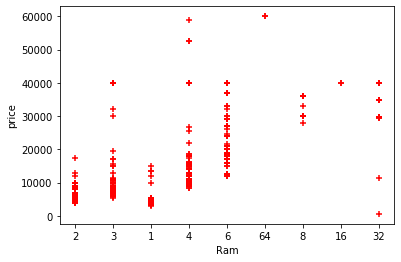

In [30]:
plt.xlabel('Ram')
plt.ylabel('price')
plt.scatter(mobiles_data['Ram'],mobiles_data['Price in Rupees'],color='red',marker='+')

In [31]:
from sklearn import linear_model

In [35]:
# Create linear regression object
lr_model = linear_model.LinearRegression()
lr_model.fit(mobiles_data[['Ram']],mobiles_data['Price in Rupees'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
# predicting price based on Ram feature.
prediction_price=lr_model.predict([[4]])  

In [53]:
prediction_price

array([12742.77015073])

In [38]:
lr_model.coef_

array([970.85825558])

In [39]:
lr_model.intercept_

8859.337128409108

In [40]:
# y = mx+b

In [41]:
970.85825558*3+8859.337128409108

11771.911895149107

In [42]:
# Save Model To a File Using Python Pickle
import pickle

In [43]:
with open('model_pickle','wb') as file:
    pickle.dump(lr_model,file)

In [44]:
# Load Saved Model

with open('model_pickle','rb') as file:
    mp = pickle.load(file)

In [45]:
mp.predict([[3]])

array([11771.91189515])

In [46]:
mp.coef_

array([970.85825558])

In [47]:
# Save Trained Model Using joblib
from sklearn.externals import joblib

In [48]:
joblib.dump(lr_model, 'model_joblib')

['model_joblib']

In [49]:
#Load Saved Model
mj = joblib.load('model_joblib')

In [54]:
mj.predict([[4]])

array([12742.77015073])